## Leitura e escritura de dados

Em Python há varios caminhos para ler e escrever dados.  A biblioteca `numpy` provee várias formas.

### `np.savetxt`

No exemplo seguinte definimos uma matriz e a salvamos como arquivo de texto. 

In [1]:
import numpy as np
x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)
np.savetxt("teste.txt", x)

Quando imprimimos ou abrimos o arquivo encontramos o seguinte

<img src="Figs/savetxt1.png" width=100% >

É possível também guardar o arquivo com um formato especial, exemplo, número de casas decimais ou como inteiros. Para isso definimos um formato como terceiro parametro no comando `savetxt`.   

Podemos mudar também o delimitador, isto é, o espaço entre um dado e outro. O delimitador padrão são casas em branco.  Podemos escolher o delimitador desejado usando o quarto parâmetro da função, `delimiter` que é um string. 


In [2]:
np.savetxt("test2.txt", x, fmt="%2.3f", delimiter=",")
np.savetxt("test3.txt", x, fmt="%04d", delimiter=" :-) ")

Esses arquivos se veem assim:

<img src="Figs/savetxt2.png" width=100% >


A sintaxe completa de `savetxt` é

In [3]:
np.savetxt('nome_arquivo.txt', x, fmt='%.18e', delimiter=' ', \
           newline='\n', header='', footer='', comments='# ')

In [3]:
np.savetxt?

Onde os parâmetros são:

* newline: é um string (e.g. "\n", "\r\n" or ",\n")
* header: um strign que será escrito no cabeçalho do arquivo
* footer: um string que será escrito no fim do arquivo
* comments: um string que será adicionado a header ou footer para sinalizar que são comentários.  O jogo da abelha é o padrão.

Se quisermos ir adicionando linhas a um arquivo. Algo feito comunmente em programas científicos onde as variáveis evoluem no espaço ou no tempo no interior de loops for ou while, o mesmo comando ira colocando os novos valores no final do arquivo. Porém para isso funcionar, temos inicialmente  que abrir o arquivo como se fosse um documento binario, e depois de escrever, fechamos ele. 


In [5]:
# para abrir o arquivo
f=open('adlinhas.txt','ab')

for iind in range(4):
    # esse comando gera um array 2x2 de numeros randomicos
    a=np.random.rand(2,2)
    # agora escrevemos
    np.savetxt(f,a)
f.close()

# note que se executamos esses comandos repetidas vezes
# iremos adicionar mais e mais linhas ao arquivo

### lendo arquivos com `np.loadtxt`

É o comando equivalente para leitura de arquivos. Vamos ler o arquivo que criamos acima

In [5]:
y = np.loadtxt('teste.txt')

In [6]:
y

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

É possivel colocar cada array dentro de 'teste.txt' num array diferente

In [7]:
x,y,z = np.loadtxt('teste.txt')

In [8]:
x

array([1., 2., 3.])

In [9]:
y

array([4., 5., 6.])

In [10]:
z

array([7., 8., 9.])

### Lendo e escrevendo com `np.load` e `np.save`

Quando os arquivos que queremos escrever vão ser lidos dentro do proprio python, o método recomendado é `np.load` e `np.save`.  O ultimo salva o arquivo em formato binario do python. Como é um binario, ele economiza espaço, porém não pode ser visualizado desde a terminal. O arquivo salvo terá a extensão `.npy`.

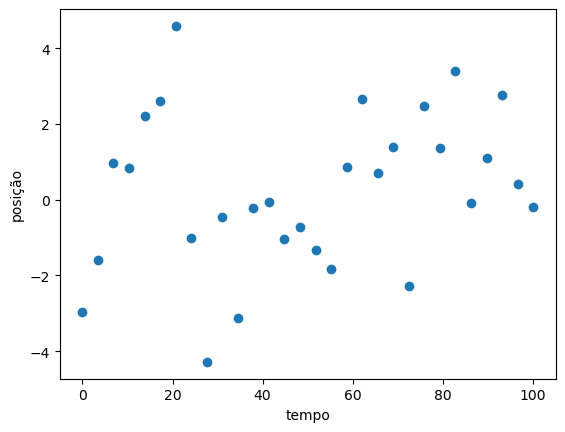

In [6]:
import matplotlib.pylab as plt
%matplotlib inline

# criamos dos arrays
tempo = np.linspace(0,100,30)
posicao = np.random.normal(0,2,30)

plt.scatter(tempo,posicao)
plt.xlabel('tempo')
plt.ylabel('posição')

# salvamos os dados com np.save
np.save('temp_vs_pos', ((tempo,posicao)))

Recuperamos os dados no arquivo *temp_vs_pos.dat* usando `np.load`

In [12]:
tempo, posicao = np.load('temp_vs_pos.npy')

Text(0, 0.5, 'posição')

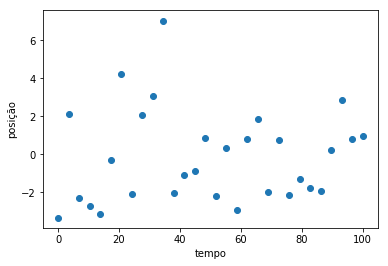

In [13]:
plt.scatter(tempo,posicao)
plt.xlabel('tempo')
plt.ylabel('posição')

### `Pandas` a biblioteca para analise de dados

Pandas é um pacote de Python que prove rotinas rápidas e expresivas para trabalhar com estruturas de dados. O objetivo de Pandas é ser a ferramenta  open-source mais poderosa e flexivel para analises de dados. Nos focaremos por enquanto na versatilidade para leitura de arquivos CSV (comma separated values).

Um bom exemplo é a tabela de alunos oferecida pelo sistema minha ufmg. 


In [8]:
import pandas as pd

In [12]:
# a variavel names é uma lista de strings onde podemos
# colocar nome a cada uma das colunas do arquivo

al = pd.read_csv('alumni/20232_DIG_FIS616_TF_1697741687440.csv',header=2, \
                     names=['index','matricula','nomes'])

In [13]:
al.head()

,,index,matricula,nomes
1,2023033327,ALBERTO ALMEIDA MATOS NETO,0,0
2,2023033173,ANAKIN DANTAS RODRIGUES,0,0
3,2022422958,BRENO CARVALHO TEIXEIRA,0,0
4,2023033203,CAROLINE RUELLA PAIVA TORRES,0,0
5,2020052525,HUGO PEREIRA DE FREITAS VIEIRA,0,0


In [14]:
al.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 26 entries, (1, 2023033327) to (26, 2023431683)
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      26 non-null     object
 1   matricula  26 non-null     int64 
 2   nomes      26 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 3.2+ KB


In [15]:
al.matricula

1   2023033327    0
2   2023033173    0
3   2022422958    0
4   2023033203    0
5   2020052525    0
6   2023076980    0
7   2021036396    0
8   2021043236    0
9   2023076956    0
10  2021036477    0
11  2022078343    0
12  2017099320    0
13  2023033033    0
14  2022422907    0
15  2023032975    0
16  2021432240    0
17  2022039755    0
18  2023032878    0
19  2016065367    0
20  2020035469    0
21  2023033289    0
22  2023076867    0
23  2020092748    0
24  2023431721    0
25  2022039461    0
26  2023431683    0
Name: matricula, dtype: int64

Com o mesmo comando podemos ler arquivos `.txt` 

In [23]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/DqHKQZGwtw4?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

## Atividade
### Mudanças da temperatura da terra

A média da temperatura na terra é $T = 14$ C. Essa temperatura tem mudado muito ao longo da historia da terra ($4.6$ bilhoes de anos), tal como se ve na figura seguinte que reconstrui a partir de abundancias de isotopos anomalia a temperatura terrestre. (Quanto mais distante no passado é feita uma medição mais imprecisa ela fica.)

*A palavra anomalia se refere a variações com respeito a uma média calculada sob algum período*. 

Uma descrição de cada um dos segmentos da figura pode ser encontrada no seguinte link:

[Paleotemperaturas](https://en.wikipedia.org/wiki/File:All_palaeotemps.png#Summary)

<img src="Figs/All_palaeotemps.svg.png" width=100% >

É interessante a variação quase-periódica do painel 4 da figura acima que mostra os chamados ciclos glaciais-interglaciais.  As mudanças de temperatura durante esses ciclos levaram à expansão (períodos glaciares) e contração (períodos interglaciares) das camadas de gelo que cobrem a terra. A partir de então, a terra permanece num período interglacial chamado Holoceno.  A existência desses ciclos se deve à mudanças cíclicas do percurso da terra arredor do sol. Mudanças na eccentricidade, inclinação do eixo de rotação e preseção do eixo de rotação contribuim aos trés ciclos dominantes chamados *ciclos de Milankovitch*.  A variação desses três ciclos altera o fluxo de radiação solar que chega na terra, impactando fortemente no clima. 

* Eccentricidade: ciclo de ~ $100.000$ anos
* Inclinação do eixo de rotação em relação ao plano da orbita arredor do sol: ciclo de $41.000$ anos
* Precesão: é um suave balanço do eixo de rotação: ciclo de $23.000$ anos. 

<img src="Figs/milankovitch.jpg" width=100% >

O quarto painel da figura acima pode ser reconstruida a partir dos dados localizados na pasta *data*, no arquivo *edc3deuttemp2007.txt*. Fonte: [nooa](https://www.ncdc.noaa.gov/data-access/paleoclimatology-data/datasets/ice-core).

<img src="Figs/paleo_tanomaly.png" width=80%>

### Aquecimento global

É possível também reconstruir a temperatura dos últimos 2000 anos usando medidas indiretas como a espessura dos aneis das árvores, crescimento dos corais, mudanças na concentração de isotopos, etc. A anomalia é apresentada na seguinte figura.    

<img src="Figs/2000_Year_Temperature.png" width=80%>

Observamos nessa figura 3 caracteristicas importantes:

1. A média global de temperatura nos últimos 25 anos tem sido maior que em qualquer período desde 1600 AD
2. Existiu uma pequena idade do gelo por volta 1700 AD
3. Existiu um período cálido medieval (MWP) centrado em 1000 AD. 

Medidas sistemáticas da temperatura começaram no fim do século XVIII. 
O arquivo localizado na pasta *data*, chamado *Complete_TAVG_complete.txt* contém os dados para reconstruir a temperatura a partir de 1750. Fonte: [berkeley earth project](http://berkeleyearth.org/).

<img src="Figs/tanomaly1750.png" width=80%>


### Emissões de CO2. 

Já que descobrimos que o aquecimento global moderno é differente àquele obtido nos registros de paleotemperatura, podemos comparar nossos dados de temperatura com outros fatores. Acredita-se que o fator determinante para o aumento de temperatura é o aumento rápido da concentração de CO2. O motivo é que o CO2 é um gas de efeito estufa (*grenhouse gas*), assim como 
o vapor de agua, o metano, o oxido nitroso e o ozonio.  

Se é verdade que sem esses gasses a temperatura da média da terra seria de $-18$ C, a acumulação rápida de CO2 está linearmente relacionada com o aumento da temperatura, podendo levar a níveis catastróficos. 

<img src="Figs/trenberth_energy_budget.png" width=80%>"

Uma acumulação desproporcional desses gases pode levar ao chamado *greenhouse runaway*, onde a temperatura do planeta aumenta, aumentando a produção de CO2 ciclicamente. Um exemplo desse fenômeno é observado em Venus, cuja temperatura é de $464^{\circ}$C.

A concentração de CO2 medido em estações meteorológicas começa aproximadamente em 1960,

<img src="Figs/C02_mauna_loa_80yr.jpeg" width=60%>"

Porém é possivel medir essa cocentração também em "núcleos" de gelo (ice cores).  Podemos estimar a concentração de CO2 nos últimos 10000 anos, 

<img src="Figs/C02_mauna_loa_10000yr.jpeg" width=60%>"

Ou nas últimas centenas de milhares de anos,  incluindo os períodos glaciares,

<img src="Figs/C02_mauna_loa_800thoyr.jpeg" width=60%>"


É evidente que a recente abundancia de CO2 não corresponde a nenhum ciclo natural, e que se correlaciona perfeitamente bem com o aumento da temperatura global, veja,


<img src="Figs/co2_temp_time.png" width=80%>"





#### Atividade: 



Descargue as três tabelas de dados no repositorio: `edc3deuttemp2007.txt`, `Complete_TAVG_complete.txt`, e `co2_mm_mlo.txt`. Essas tabelas estão na pasta  `data` 

1. Para a tabela de paleo-temperaturas estime a inclinação da curva quando a temperatura aumenta para algum dos períodos glaciares. Ou seja e estime a taxa de crescimento da temperatura como função do tempo para algum período glaciar.

2. Faça o mesmo, estime a taxa de crescimento da temperatura,  para a tabela de dados com medidas diretas de temperatura. Faça uma analise começando no ano de 1850, e outra começando a partir de 1950.

3. Discuta criticamente seus resultados em relação ao aquecimento global antropogénico. 

4. Em uma unica figura compare a anomalia de temperatura como função do tempo e a concentração de CO2 como função do tempo (ou seja, reproduça a figura acima). 

5. Por fim, usando minimos quadrados, encontre o índice de correlação entre a anomalia de temperatura e a concetração de CO2.

## Analises estatatísticas usando `seaborn`

O pacote `seaborn` contém funçoes para criar graficos que facilitam analises estatísticas. 

* As ferramentas permitem determinar facilmente correlações entre variables quando nosso dominio (numero de variáveis) possui multiples dimensões. 

* Também calcula automaticamente a regressão linear entre pares de variáveis correlacionadas

* E permite representar graficamente as barras de erro e a confidencia estatistica dos dados.

* `seaborn` foi construido sob `matplotlib` e está integrada a `pandas`.

Um excelente tutorial se encontra na pagina do [seaborn](https://seaborn.pydata.org/tutorial.html).

Vamos revisar algumas das suas funcionalidades visualizando o arquivo *USA_Housing.csv* que se encontra na pasta *data* do nosso repositorio. 

Esse documento tem informações do negocio imobiliario nos Estados Unidos. A analise correta dos dados pode ajudar preveer preços de bens imobiliarios (casas). A tabela tem as seguintes colunas:

* 'Avg. Area Income': Ingresso médio dos residentes da cidade onde está o imóvel.
* 'Avg. Area House Age': Idade média das casas
* 'Avg. Area Number of Rooms': Número de comodos
* 'Avg. Area Number of Bedrooms': Númerod de quartos
* 'Area Population': População da cidade
* 'Price': Preço de venda do imóvel
* 'Address': Endereço



In [24]:
# Começamos chamando a biblioteca
import seaborn as sns
import pandas as pd

In [25]:
data_im = pd.read_csv('data/USA_Housing.csv')
data_im.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [26]:
data_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Uma das ferramentas mais interessantes do `seaborn` é o `seaborn.pairplot`, que grafica todas as possíveis correlações do universo de dados na tabela

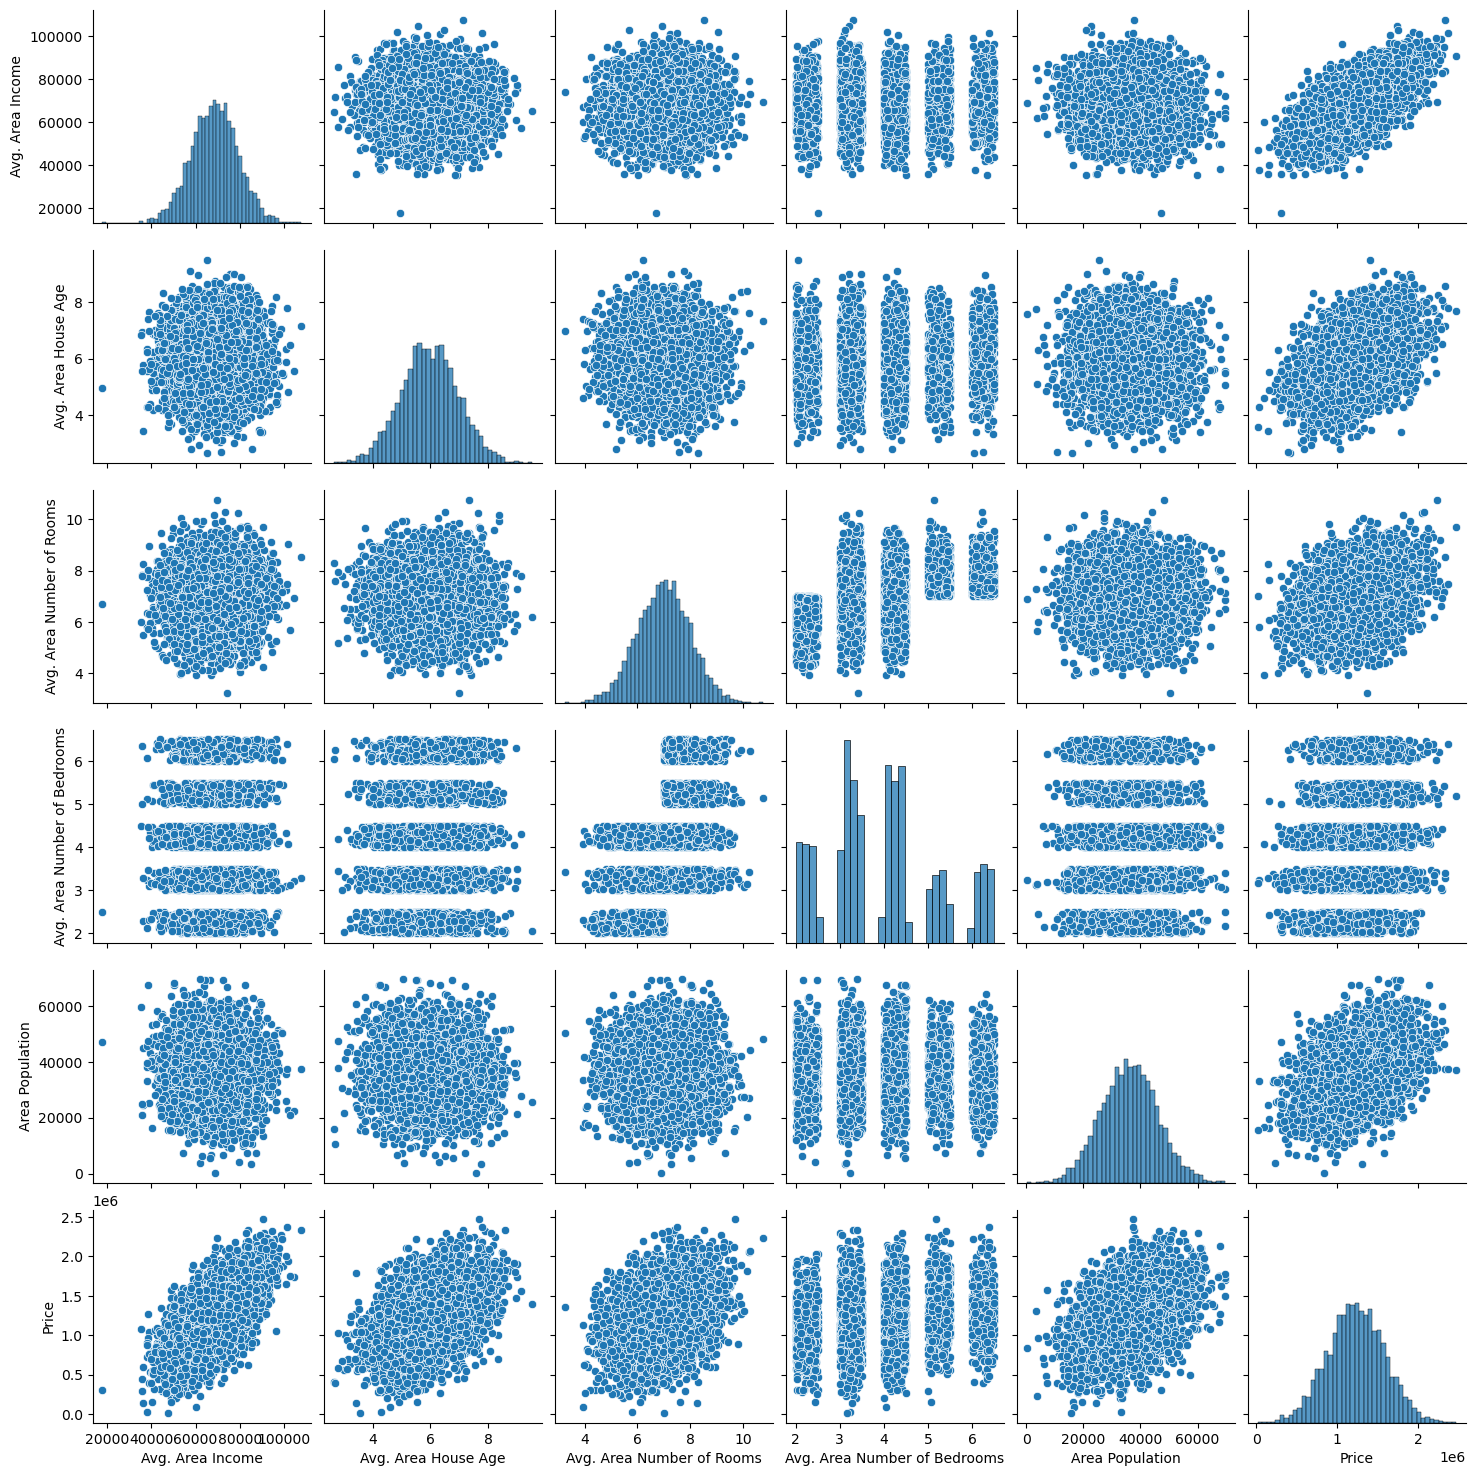

In [27]:
sns.pairplot(data_im)

A figura deixa evidente a clara correlação entre o *preço* e o *ingresso médio dos residentes*. Mas também existem correlaçõs, obvias, entre o *preço* e a *idade*, o *numero de quartos* e  a *população*. Podemos estimar a correlação utilizando a ferramenta `seaborn.jointplot`. Essa ferramenta, alem de calcular e apresentar a correlação, apresenta qual é a distribuição de cada conjunto de dados. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


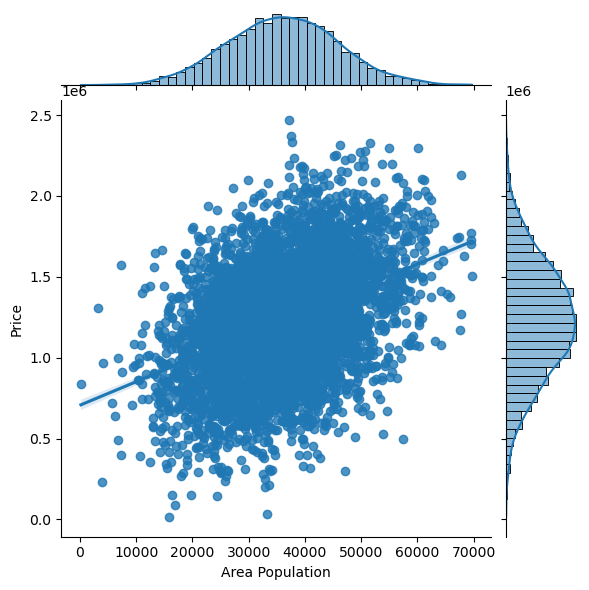

In [28]:
import scipy.stats as stats
x_str ='Area Population'
y_str = 'Price'
z_str = 'Address'
sns.jointplot(x_str, y_str,data=data_im,kind="reg");

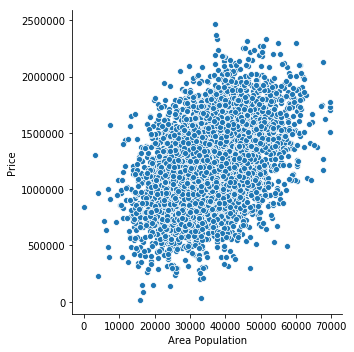

In [8]:
sns.relplot(x_str, y_str, data=data_im)